In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from quick_knn.lsh import integrate, fp_prob, fn_prob

`fp_probs` represents the probability of a false positive meaning a set that has a jaccard similarity less than thresh while `fn_probs` is the probability of a set that has a jaccard higher than threshold not being returned.

To find the optimal b and r we integrate these function and try to minimize the area under these curves

In [2]:
def fp_probs(s, b, r):
    return 1 - (1 - s ** r) ** b

def fn_probs(s, b, r):
    return 1 - (1 - (1 - s ** r) ** b)

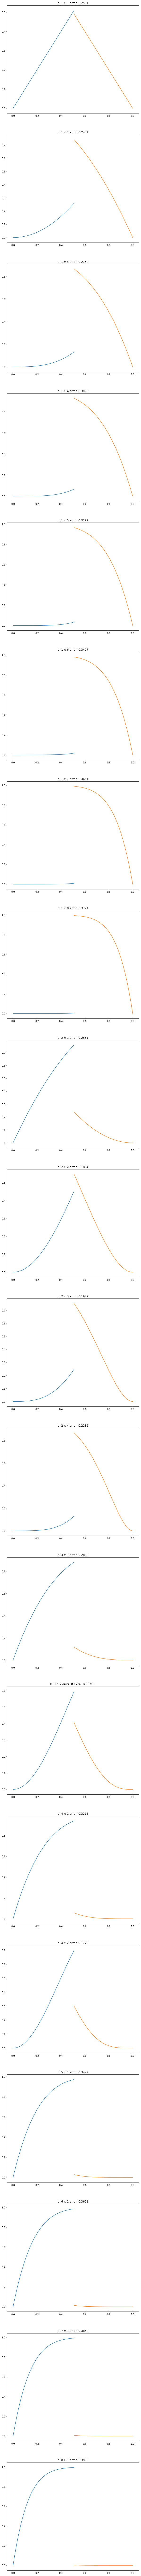

In [4]:
bits = 8

bs = []
rs = []

for b in range(1, bits + 1):
    max_r = bits // b
    for r in range(1, max_r + 1):
        bs.append(b)
        rs.append(r)
        
bs = np.array(bs)
rs = np.array(rs)
        
fig, ax = plt.subplots(len(bs), 1, figsize=(10, len(bs) * 10))

thresh = 0.51
xp = np.linspace(0, thresh, 500)
xn = np.linspace(thresh, 1.0, 500)

for i, (b, r) in enumerate(zip(bs, rs)):
    error = fp_prob(thresh, bs, rs) + fn_prob(thresh, bs, rs)
    
    yp = fp_probs(xp, b, r)
    yn = fn_probs(xn, b, r)

    ax[i].plot(xp, yp)
    ax[i].plot(xn, yn)
    ax[i].set_title(f"b: {b} r: {r} error: {error[i]:.4f}{'  BEST!!!!!' if error[i] == np.min(error) else ''}")